In [ ]:

import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor


In [ ]:
df = pd.read_csv('eth-dataset.csv')


In [ ]:
df.head()

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_root,receipt_status,block_timestamp,block_number,block_hash
0,0x02152466aefd2d61930d57ff476c41a439785fa0dc6f...,1011,82,0xae7fed934554abfac62b57e2c904715e817c2026,0x01af28275a3e914386761fa0c978f33fcb3d2ba1,0.0,5000000,2.000000e+10,0xc3e55501000000000000000000000000000000000000...,3229819,327680,NaN,NaN,1,2019-07-01 12:50:12 UTC,8065731,0x74c7864c7da5b574d707dfa9d194cdbb3874f7562544...
1,0xc8e92ee34f0cedfb42ad6675e9ccd957385272e848d7...,11,161,0x3f0138ffb9ee3c35c034933ff9e9ce27d1d2925c,0xaa090b9143c61b08259e185088119c971fa6707c,0.0,300000,1.000000e+09,0x311b2da3,7743733,67072,NaN,NaN,1,2019-07-01 22:08:57 UTC,8068236,0xe8bda95718de14fa955a2a1b79996005782f6de543cb...
2,0x1e92b860d13af20fac26151d4940c230a7b408f1b3a8...,2891,61,0xffa5bfe92b6791dad23c7837abb790b48c2f8995,0x8018280076d7fa2caa1147e441352e8a89e1ddbe,0.0,748152,1.460000e+09,0x00030504041ca4695f42289c4051d88471b1058cfd00...,4591712,593152,NaN,NaN,1,2019-07-01 00:21:27 UTC,8062384,0x8c1312432241ece13646bd334a886124fbdd084ee40c...
3,0xf3687aaee3b1ddce98263053ceb5fe192ae552128faa...,80674,142,0x1f8cdd31345faa00bbdf946fa257b7feb706b535,0xba3ed686cc32ffa8664628b1e96d8022e40543de,0.0,200000,1.800000e+10,0xd9b6e0a6000000000000000000000000ae320ffe3236...,5468398,72192,NaN,NaN,1,2019-07-01 11:11:49 UTC,8065291,0x961ec59b1ac26377b635212ad2ff73e6b78ce4b90817...
4,0xd9b88b291b1a3795cefbec772bf8cfa41d58a2a07502...,81103,4,0x1f8cdd31345faa00bbdf946fa257b7feb706b535,0xba3ed686cc32ffa8664628b1e96d8022e40543de,0.0,200000,5.000000e+09,0xd9b6e0a6000000000000000000000000ae320ffe3236...,424947,72192,NaN,NaN,1,2019-07-01 20:49:28 UTC,8067859,0xbfdcb991d66f49acdd4231318c92db7a0cb53f477e36...


In [ ]:
def hex_to_int(hex_string):
    return int(hex_string, 16)

df['block_hash'] = df['block_hash'].apply(hex_to_int)


In [ ]:
df.head()

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_root,receipt_status,block_timestamp,block_number,block_hash
0,0x02152466aefd2d61930d57ff476c41a439785fa0dc6f...,1011,82,0xae7fed934554abfac62b57e2c904715e817c2026,0x01af28275a3e914386761fa0c978f33fcb3d2ba1,0.0,5000000,2.000000e+10,0xc3e55501000000000000000000000000000000000000...,3229819,327680,NaN,NaN,1,2019-07-01 12:50:12 UTC,8065731,5282081989774842128265031851503526106264943318...
1,0xc8e92ee34f0cedfb42ad6675e9ccd957385272e848d7...,11,161,0x3f0138ffb9ee3c35c034933ff9e9ce27d1d2925c,0xaa090b9143c61b08259e185088119c971fa6707c,0.0,300000,1.000000e+09,0x311b2da3,7743733,67072,NaN,NaN,1,2019-07-01 22:08:57 UTC,8068236,1052716837098277386029633108551622074466386718...
2,0x1e92b860d13af20fac26151d4940c230a7b408f1b3a8...,2891,61,0xffa5bfe92b6791dad23c7837abb790b48c2f8995,0x8018280076d7fa2caa1147e441352e8a89e1ddbe,0.0,748152,1.460000e+09,0x00030504041ca4695f42289c4051d88471b1058cfd00...,4591712,593152,NaN,NaN,1,2019-07-01 00:21:27 UTC,8062384,6335749493724649062061310628061500487292333026...
3,0xf3687aaee3b1ddce98263053ceb5fe192ae552128faa...,80674,142,0x1f8cdd31345faa00bbdf946fa257b7feb706b535,0xba3ed686cc32ffa8664628b1e96d8022e40543de,0.0,200000,1.800000e+10,0xd9b6e0a6000000000000000000000000ae320ffe3236...,5468398,72192,NaN,NaN,1,2019-07-01 11:11:49 UTC,8065291,6790129652507344732802318508791931230121167186...
4,0xd9b88b291b1a3795cefbec772bf8cfa41d58a2a07502...,81103,4,0x1f8cdd31345faa00bbdf946fa257b7feb706b535,0xba3ed686cc32ffa8664628b1e96d8022e40543de,0.0,200000,5.000000e+09,0xd9b6e0a6000000000000000000000000ae320ffe3236...,424947,72192,NaN,NaN,1,2019-07-01 20:49:28 UTC,8067859,8678174118850415928305756069896486639164038575...


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
G = nx.Graph()


In [ ]:
for index, row in df.iterrows():
    from_addr = row['from_address']
    to_addr = row['to_address']
    value = row['value']

    G.add_node(from_addr)
    G.add_node(to_addr)

    G.add_edge(from_addr, to_addr, value=value)


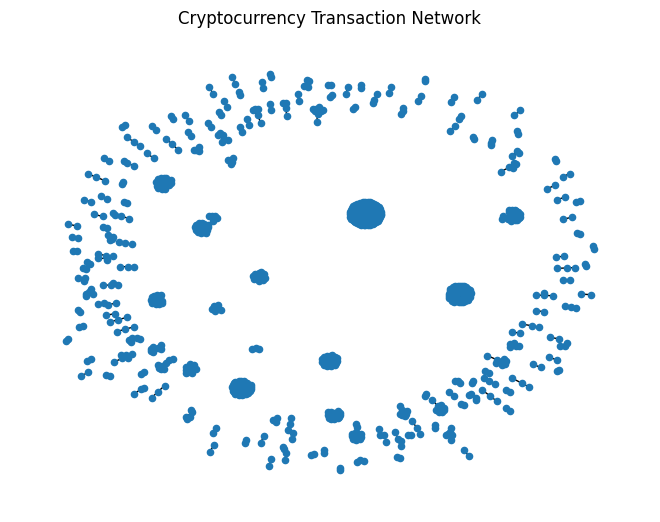

In [ ]:

pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=False, node_size=20)
plt.title("Cryptocurrency Transaction Network")
plt.show()


In [ ]:
df

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_root,receipt_status,block_timestamp,block_number,block_hash
0,0x02152466aefd2d61930d57ff476c41a439785fa0dc6f...,1011,82,0xae7fed934554abfac62b57e2c904715e817c2026,0x01af28275a3e914386761fa0c978f33fcb3d2ba1,0.000000e+00,5000000,2.000000e+10,0xc3e55501000000000000000000000000000000000000...,3229819,327680,NaN,NaN,1,2019-07-01 12:50:12 UTC,8065731,5282081989774842128265031851503526106264943318...
1,0xc8e92ee34f0cedfb42ad6675e9ccd957385272e848d7...,11,161,0x3f0138ffb9ee3c35c034933ff9e9ce27d1d2925c,0xaa090b9143c61b08259e185088119c971fa6707c,0.000000e+00,300000,1.000000e+09,0x311b2da3,7743733,67072,NaN,NaN,1,2019-07-01 22:08:57 UTC,8068236,1052716837098277386029633108551622074466386718...
2,0x1e92b860d13af20fac26151d4940c230a7b408f1b3a8...,2891,61,0xffa5bfe92b6791dad23c7837abb790b48c2f8995,0x8018280076d7fa2caa1147e441352e8a89e1ddbe,0.000000e+00,748152,1.460000e+09,0x00030504041ca4695f42289c4051d88471b1058cfd00...,4591712,593152,NaN,NaN,1,2019-07-01 00:21:27 UTC,8062384,6335749493724649062061310628061500487292333026...
3,0xf3687aaee3b1ddce98263053ceb5fe192ae552128faa...,80674,142,0x1f8cdd31345faa00bbdf946fa257b7feb706b535,0xba3ed686cc32ffa8664628b1e96d8022e40543de,0.000000e+00,200000,1.800000e+10,0xd9b6e0a6000000000000000000000000ae320ffe3236...,5468398,72192,NaN,NaN,1,2019-07-01 11:11:49 UTC,8065291,6790129652507344732802318508791931230121167186...
4,0xd9b88b291b1a3795cefbec772bf8cfa41d58a2a07502...,81103,4,0x1f8cdd31345faa00bbdf946fa257b7feb706b535,0xba3ed686cc32ffa8664628b1e96d8022e40543de,0.000000e+00,200000,5.000000e+09,0xd9b6e0a6000000000000000000000000ae320ffe3236...,424947,72192,NaN,NaN,1,2019-07-01 20:49:28 UTC,8067859,8678174118850415928305756069896486639164038575...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0xe9e8d5633a578365990ba6108d7efd58f4338285af65...,96,142,0x2ab7b3e7a28d2390fe6f31d4a1aee8f5602806c7,0xc8de088bf25a8aed5c1f74f6f4a7a33e95516302,0.000000e+00,90000,1.200000e+10,0xa9059cbb00000000000000000000000054b5767a27c2...,7351132,36353,NaN,NaN,1,2019-07-01 07:32:59 UTC,8064310,7288253065834006524216134581036210308621955645...
996,0x2f46b8b6694f0ce8b71d3c663f234c1d8421385203ac...,97,143,0x2ab7b3e7a28d2390fe6f31d4a1aee8f5602806c7,0xc8de088bf25a8aed5c1f74f6f4a7a33e95516302,0.000000e+00,90000,1.200000e+10,0xa9059cbb000000000000000000000000aba816da7b5d...,7387485,36353,NaN,NaN,1,2019-07-01 07:32:59 UTC,8064310,7288253065834006524216134581036210308621955645...
997,0xcbf286da1039eb8e60c06e5738a9bfa0e55367b07af5...,94,138,0x2ab7b3e7a28d2390fe6f31d4a1aee8f5602806c7,0xc8de088bf25a8aed5c1f74f6f4a7a33e95516302,0.000000e+00,90000,1.200000e+10,0xa9059cbb000000000000000000000000b9f06dd1bf88...,6883640,36353,NaN,NaN,1,2019-07-01 07:32:59 UTC,8064310,7288253065834006524216134581036210308621955645...
998,0xf2b83fa5b8b0978df46b7489630dadbc7ba09b44d63b...,9,156,0x2bb7b3e7a28d2390fe6f31d4a1aee8f5602806c7,0xc9de088bf25a8aed5c1f74f6f4a7a33e95516302,0.000000e+00,90000,1.200000e+10,0xa9059cbb00000000000000000000000035dc86b11c2a...,7649608,36353,NaN,NaN,1,2019-07-01 03:38:49 UTC,8063290,6706498022338172512575112045461030571878884020...


In [ ]:
from sklearn.cluster import KMeans


In [ ]:

features = df[['value', 'gas', 'gas_price']]


In [ ]:
n_clusters = 4


In [ ]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(features)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:

df['distance_to_centroid'] = kmeans.transform(features).min(axis=1)

anomaly_threshold = df['distance_to_centroid'].quantile(0.95)

anomalies = df[df['distance_to_centroid'] > anomaly_threshold]


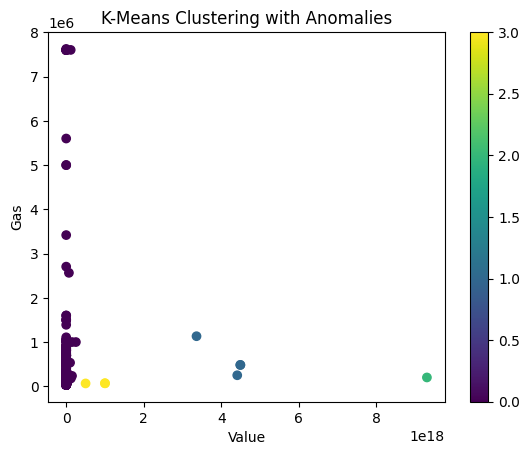

Anomalies:
                                                  hash  nonce  \
59   0xff1bf87430bea12a62350722832329eb2ce4d097b096...     54   
203  0xb4a6d00ba01fe6772ac1422e82f03fa551da2995d23c...      9   
204  0xcd49621b8518c72bb9b1806dfa8884a2bb4efad8ab32...      7   
503  0x30d657e35c243d12f5939a0d7bba09dfb5981ea842d3...    518   
632  0x4055f1f9854e158c68c1bf6a27da64c853bd82b1b787...      0   
650  0xa5047e9ad8f2ec265ea0738f3e8e564ef6dca6e03df2...      4   
675  0xf8ddbb93861cfe713f9dc85f780f524e3d75a908d10c...   3629   
676  0xf63fda4caeff083b5eacdebd17891c3e9cd92c37332f...   3569   
677  0x2082c821c31ef42b2aba012f8cbb803ce63f3bb0af0d...   3577   
684  0x4650729b2c152d918e6aaf085de678e06d554e54a4ee...   1264   
685  0x019883dfb4f741638ac8934f915711dc85d34039ce04...   1266   
686  0xff251e1d1265925ec443afd7e6fe1cc626baebeb1f15...   1167   
692  0x6d39cd3871da5a4a807bb067a9ca0ad32ff1c9205398...   1705   
693  0x8706f2adbdebb2f648319a822640be3035307f510163...   1534   
694  0x079c0ee

In [ ]:

plt.scatter(df['value'], df['gas'], c=df['cluster'], cmap='viridis')
plt.colorbar()
plt.title('K-Means Clustering with Anomalies')
plt.xlabel('Value')
plt.ylabel('Gas')
plt.show()

print("Anomalies:")
print(anomalies)


In [ ]:


# Create a directed graph
import networkx as nx
G = nx.DiGraph()

# Add nodes and edges from the DataFrame
for index, row in df.iterrows():
    from_addr = row['from_address']
    to_addr = row['to_address']
    value = row['value']

    G.add_edge(from_addr, to_addr, value=value)


In [ ]:
# Calculate in-degree and out-degree for each node
in_degrees = G.in_degree()
out_degrees = G.out_degree()

# Display degrees of some nodes
print("In-Degrees:")
print(dict(in_degrees))
print("Out-Degrees:")
print(dict(out_degrees))


In-Degrees:
{'0xae7fed934554abfac62b57e2c904715e817c2026': 0, '0x01af28275a3e914386761fa0c978f33fcb3d2ba1': 1, '0x3f0138ffb9ee3c35c034933ff9e9ce27d1d2925c': 0, '0xaa090b9143c61b08259e185088119c971fa6707c': 21, '0xffa5bfe92b6791dad23c7837abb790b48c2f8995': 0, '0x8018280076d7fa2caa1147e441352e8a89e1ddbe': 2, '0x1f8cdd31345faa00bbdf946fa257b7feb706b535': 0, '0xba3ed686cc32ffa8664628b1e96d8022e40543de': 1, '0xad7402ef215183486f17a04bbc4f0b7da4d38f8c': 0, '0x778fdaf34bb5993d69968f541152451241fab7e3': 3, '0x257b0f7d6f472302c08d249f058509709fecafe2': 0, '0xb6c946665a0f6664baed10043f6d3544fa27fa64': 0, '0x84b5d38989283548a39a86646ac7073c54a8b876': 1, '0xec5858fef63fba592a68a850327526ecbf7cf525': 0, '0xca5000e2402d52574771958bce893836755790f6': 1, '0xd48a7f2f5653db7ba8897dbe17aef7249cf0dfb0': 0, '0x8562c38485b1e8ccd82e44f89823da76c98eb0ab': 3, '0x5e5784027cf96499d09b23d01c5b7e12b7e6659b': 0, '0x09086a772d9e9b99380e2735bf4ff3dec3ead8f5': 0, '0x8450e578aac89c35bf31ca13551f4b9be7b979ff': 0, '0x875

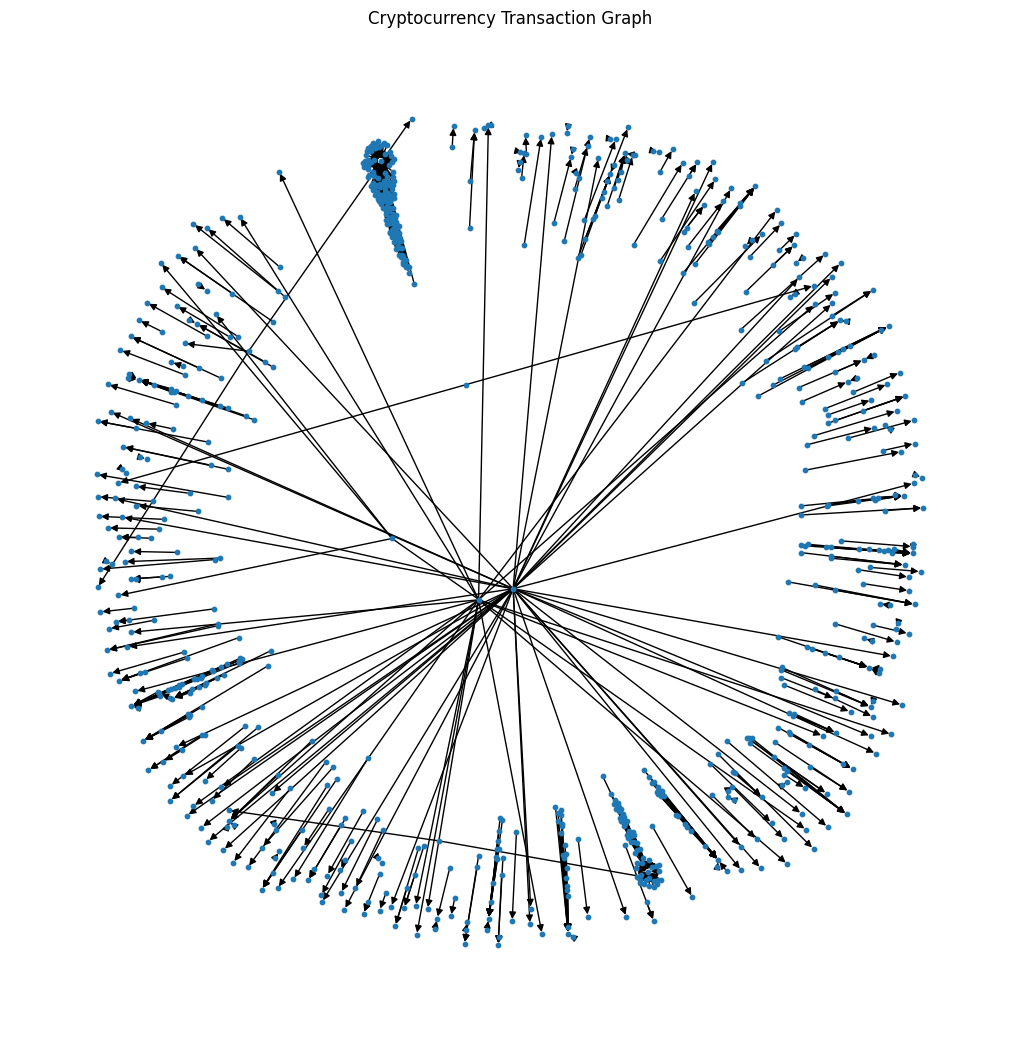

In [ ]:
import matplotlib.pyplot as plt

# Draw the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=10)
plt.title("Cryptocurrency Transaction Graph")
plt.axis('off')
plt.show()


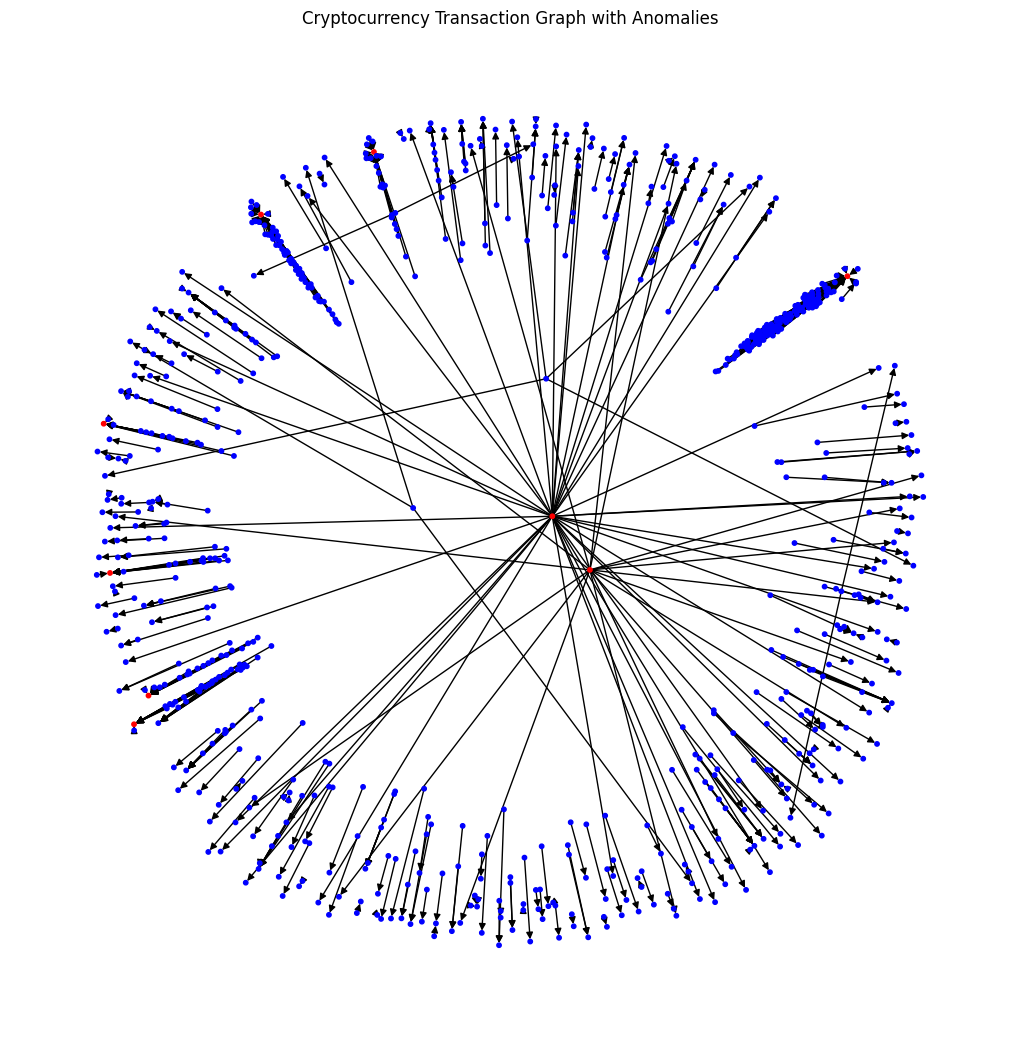

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from the DataFrame
for index, row in df.iterrows():
    from_addr = row['from_address']
    to_addr = row['to_address']
    value = row['value']

    G.add_edge(from_addr, to_addr, value=value)

# Calculate in-degrees (receiving addresses) and out-degrees (sending addresses)
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Define a threshold for anomaly detection (you can adjust this)
high_degree_threshold = np.mean(list(in_degrees.values())) + 2 * np.std(list(in_degrees.values()))
low_degree_threshold = np.mean(list(in_degrees.values())) - 2 * np.std(list(in_degrees.values()))

# Identify high-degree receiving addresses (anomalies)
high_degree_receiving_addresses = [node for node, degree in in_degrees.items() if degree > high_degree_threshold]

# Identify low-degree receiving addresses (anomalies)
low_degree_receiving_addresses = [node for node, degree in in_degrees.items() if degree < low_degree_threshold]

# Identify high-degree sending addresses (anomalies)
high_degree_sending_addresses = [node for node, degree in out_degrees.items() if degree > high_degree_threshold]

# Identify low-degree sending addresses (anomalies)
low_degree_sending_addresses = [node for node, degree in out_degrees.items() if degree < low_degree_threshold]

# Visualization with anomalies highlighted
anomaly_nodes = set(high_degree_receiving_addresses + low_degree_receiving_addresses + high_degree_sending_addresses + low_degree_sending_addresses)

pos = nx.spring_layout(G)
node_colors = ['r' if node in anomaly_nodes else 'b' for node in G.nodes()]

plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=False, node_size=10, node_color=node_colors)
plt.title("Cryptocurrency Transaction Graph with Anomalies")
plt.axis('off')
plt.show()


In [ ]:
# Select relevant features
X = df[['value']].values


In [ ]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)


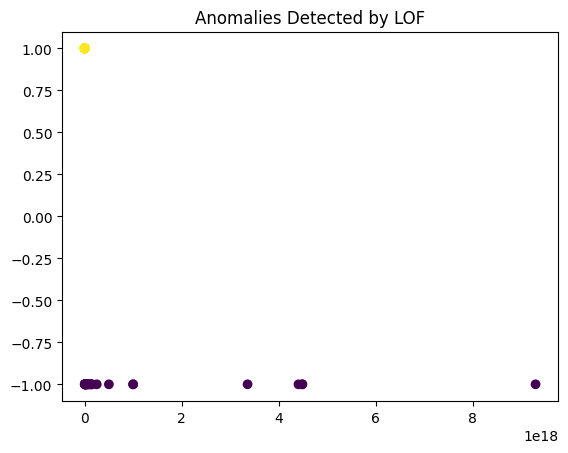

In [ ]:
plt.scatter(X[:, 0], y_pred, c=y_pred, cmap='viridis')
plt.title('Anomalies Detected by LOF')
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


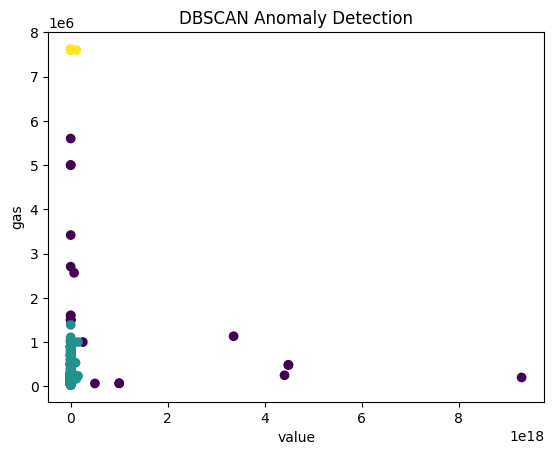

Anomalies:
                                                  hash  nonce  \
0    0x02152466aefd2d61930d57ff476c41a439785fa0dc6f...   1011   
21   0x9d7c5b2acd9ee1402c0f02c75c3eb4616ef3a37e7e6b...     10   
81   0x424a20051489233ee694497a8306fb03ff138881966d...     86   
82   0x3f6e7823deb987c5b17685baddc89c18783d32e061ec...    117   
83   0x919721974420e80c18b7ad71c1227346e8ea455c6068...     15   
185  0xf4164f5878df118f2a3f4c25a4752c31bc50a03e5f61...   9289   
203  0xb4a6d00ba01fe6772ac1422e82f03fa551da2995d23c...      9   
503  0x30d657e35c243d12f5939a0d7bba09dfb5981ea842d3...    518   
645  0x5f4963e55f45d053246c9b7102fe793cdec443277ade...    193   
650  0xa5047e9ad8f2ec265ea0738f3e8e564ef6dca6e03df2...      4   
684  0x4650729b2c152d918e6aaf085de678e06d554e54a4ee...   1264   
685  0x019883dfb4f741638ac8934f915711dc85d34039ce04...   1266   
686  0xff251e1d1265925ec443afd7e6fe1cc626baebeb1f15...   1167   
692  0x6d39cd3871da5a4a807bb067a9ca0ad32ff1c9205398...   1705   
693  0x8706f2a

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('eth-dataset.csv')

# Replace 'Feature1' and 'Feature2' with your actual column names
feature_columns = ['value', 'gas', 'gas_price']

# Select the features you want to use for DBSCAN
features = df[feature_columns]

# Standardize the features (mean = 0, variance = 1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create and fit the DBSCAN model
eps = 0.5  # Adjust the neighborhood distance parameter as needed
min_samples = 5  # Adjust the minimum number of samples in a neighborhood as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(scaled_features)

# Get the labels assigned by DBSCAN (-1 indicates outliers/anomalies)
labels = dbscan.labels_

# Visualize the results
plt.scatter(features[feature_columns[0]], features[feature_columns[1]], c=labels)
plt.title('DBSCAN Anomaly Detection')
plt.xlabel(feature_columns[0])
plt.ylabel(feature_columns[1])
plt.show()

# Identify the indices of the outliers
outlier_indices = df[labels == -1].index

# You can now access the data points that are labeled as outliers using outlier_indices
# For example: df.iloc[outlier_indices] will give you the rows that are outliers

# Access and print the actual data points that are outliers
anomalies = df.iloc[outlier_indices]
print("Anomalies:")
print(anomalies)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


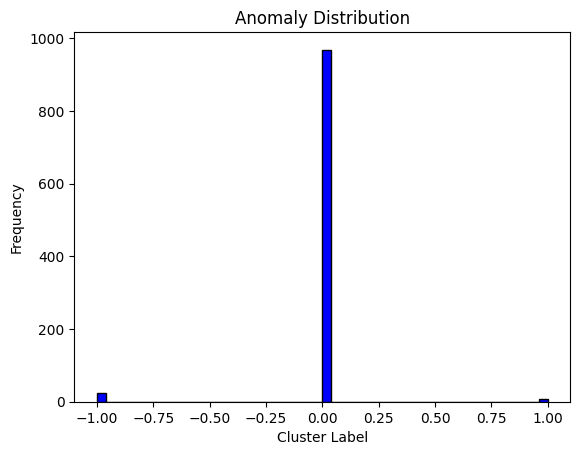

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('eth-dataset.csv')

# Replace 'Feature1' and 'Feature2' with your actual column names
feature_columns = ['value', 'gas', 'gas_price']

# Select the features you want to use for DBSCAN
features = df[feature_columns]

# Standardize the features (mean = 0, variance = 1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create and fit the DBSCAN model
eps = 0.5  # Adjust the neighborhood distance parameter as needed
min_samples = 5  # Adjust the minimum number of samples in a neighborhood as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(scaled_features)

# Get the labels assigned by DBSCAN (-1 indicates outliers/anomalies)
labels = dbscan.labels_

# Create a histogram to visualize the distribution of anomalies
plt.hist(labels, bins=50, color='blue', edgecolor='black')
plt.title('Anomaly Distribution')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.show()

# Identify the indices of the outliers
outlier_indices = df[labels == -1].index

# You can now access the data points that are labeled as outliers using outlier_indices
# For example: df.iloc[outlier_indices] will give you the rows that are outliers


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


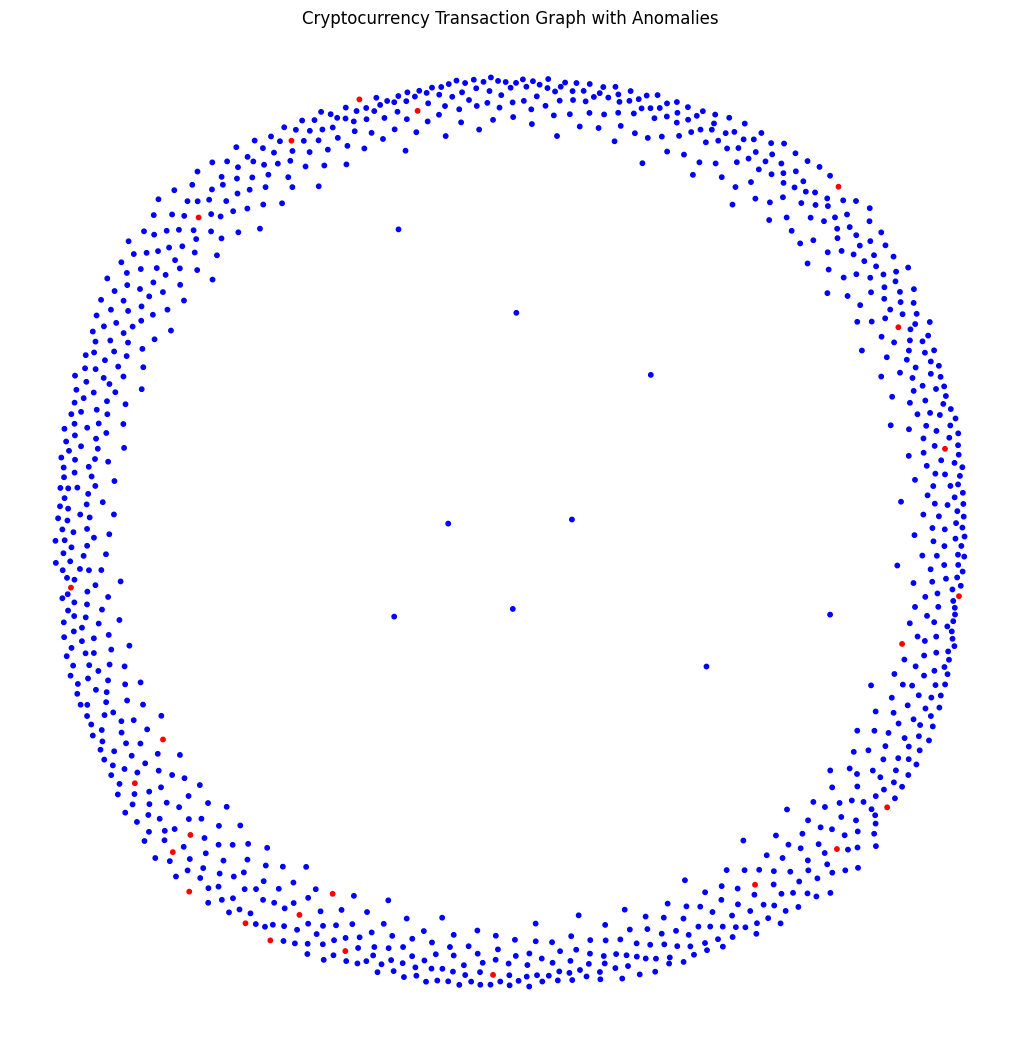

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import networkx as nx

# Load your dataset
df = pd.read_csv('eth-dataset.csv')

# Replace 'Feature1' and 'Feature2' with your actual column names
feature_columns = ['value', 'gas', 'gas_price']

# Select the features you want to use for DBSCAN
features = df[feature_columns]

# Standardize the features (mean = 0, variance = 1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create and fit the DBSCAN model
eps = 0.5  # Adjust the neighborhood distance parameter as needed
min_samples = 5  # Adjust the minimum number of samples in a neighborhood as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(scaled_features)

# Get the labels assigned by DBSCAN (-1 indicates outliers/anomalies)
labels = dbscan.labels_

# Create a NetworkX graph
G = nx.Graph()

# Add nodes to the graph, labeling anomalies in red
anomaly_nodes = [node for node, label in enumerate(labels) if label == -1]
for node in range(len(labels)):
    G.add_node(node, color='r' if node in anomaly_nodes else 'b')

# You can add edges between nodes if your dataset contains edge information
# Example: G.add_edge(node1, node2)

# Visualize the graph with anomalies in red
pos = nx.spring_layout(G)
node_colors = [data['color'] for node, data in G.nodes(data=True)]

plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=False, node_size=10, node_color=node_colors)
plt.title("Cryptocurrency Transaction Graph with Anomalies")
plt.axis('off')
plt.show()

# Identify the indices of the outliers
outlier_indices = df[labels == -1].index

# You can now access the data points that are labeled as outliers using outlier_indices
# For example: df.iloc[outlier_indices] will give you the rows that are outliers


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


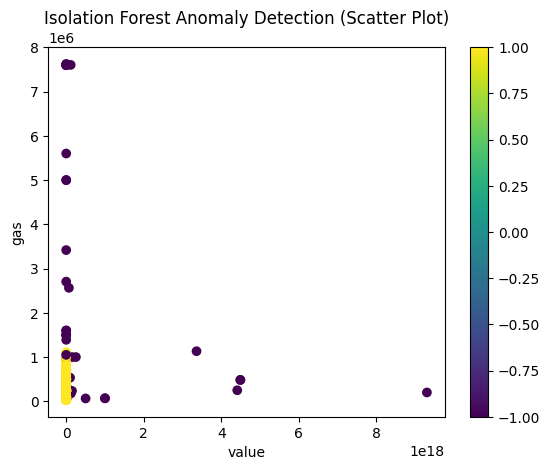

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('eth-dataset.csv')

# Replace 'Feature1' and 'Feature2' with your actual column names
feature_columns = ['value', 'gas', 'gas_price']

# Select the features you want to use for Isolation Forest
features = df[feature_columns]

# Create and fit the Isolation Forest model
contamination = 0.05  # Adjust the contamination parameter based on your expected anomaly rate
isolation_forest = IsolationForest(contamination=contamination)
isolation_forest.fit(features)

# Predict anomalies (outliers)
outliers = isolation_forest.predict(features)

# Visualize the results with a scatter plot
plt.scatter(features[feature_columns[0]], features[feature_columns[1]], c=outliers, cmap='viridis')
plt.title('Isolation Forest Anomaly Detection (Scatter Plot)')
plt.xlabel(feature_columns[0])
plt.ylabel(feature_columns[1])
plt.colorbar()
plt.show()

# Identify the indices of the outliers (anomalies)
outlier_indices = [i for i, outlier in enumerate(outliers) if outlier == -1]

# You can now access the data points that are labeled as outliers using outlier_indices
# For example: df.iloc[outlier_indices] will give you the rows that are outliers
